#### Jennifer Camacho, Octavia Larentis and Lauren Picado - 18 May, 2019
-------------------------------------------------------------------------------------------------------------------------------
# Robust Principal Component Analysis (RPCA) for detecting Moving Foreground in a Video Sequence
### Statistical Analysis

#### Convergence Plot

In [2]:
import re
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [15]:
def processConvergenceLog(filename):
    f = open(filename + ".txt", "r") 
    f = f.read()
    f = re.sub('\[','', f)
    f = re.sub('\]','', f)
    f = re.sub('\.\.\.','', f)
    f = re.sub('\n','', f)
    f = re.sub('0.0.','0', f)
    f = f.split(' ')
    f = [x for x in f if x.strip()]
    g = np.arange(1,(len(f) + 1))

    return f, g

In [33]:
def plotConvergence(filename, convergence_dl, iterations_dl, convergence_ds, iterations_ds):
    convergence_plot = plt.figure(1)
    convergence_dl = [float(i[:3]) for i in convergence_dl] 
    convergence_ds = [float(i[:3]) for i in convergence_ds] 
    convergence = []
    
    y = min(len(convergence_ds), len(convergence_dl))
    
    for i in range(0, y):
        tmp = abs(convergence_ds[i] - convergence_dl[i])
        convergence.append(tmp)
    
    
    plt.plot(iterations_dl[:y], convergence[:y],'b*--', label="Convergence")
    plt.plot(iterations_dl[:y], convergence_dl[:y],'r*:', label="dL")
    plt.plot(iterations_ds[:y], convergence_ds[:y],'g*:', label="dS")
    plt.xlabel('Iterations')
    plt.ylabel('Convergence')
    convergence_plot.savefig(filename + '.jpg')
    plt.close(convergence_plot)

In [34]:
highway_pcp_dl, iterations_h_pcp_dl = processConvergenceLog("highway_pcp_dl")
highway_pcp_ds, iterations_h_pcp_ds = processConvergenceLog("highway_pcp_ds")
highway_spcp_dl, iterations_h_spcp_dl = processConvergenceLog("highway_spcp_dl")
highway_spcp_ds, iterations_h_spcp_ds = processConvergenceLog("highway_spcp_ds")
highway_pcp_vary_dl, iterations_h_pcp_vary_dl = processConvergenceLog("highway_pcp_vary_dl")
highway_pcp_vary_ds, iterations_h_pcp_vary_ds = processConvergenceLog("highway_pcp_vary_ds")
highway_spcp_vary_dl, iterations_h_spcp_vary_dl = processConvergenceLog("highway_spcp_vary_dl")
highway_spcp_vary_ds, iterations_h_spcp_vary_ds = processConvergenceLog("highway_spcp_vary_ds")

plotConvergence("highway_pcp_convergence", highway_pcp_dl, iterations_h_pcp_dl, highway_pcp_ds, iterations_h_pcp_ds)
plotConvergence("highway_spcp_convergence", highway_spcp_dl, iterations_h_spcp_dl, highway_spcp_ds, iterations_h_spcp_ds)
plotConvergence("highway_pcp_vary_convergence", highway_pcp_vary_dl, iterations_h_pcp_vary_dl, highway_pcp_vary_ds, iterations_h_pcp_vary_ds)
plotConvergence("highway_spcp_vary_convergence", highway_spcp_vary_dl, iterations_h_spcp_vary_dl, highway_spcp_vary_ds, iterations_h_spcp_vary_ds)

pedestrian_pcp_dl, iterations_p_pcp_dl = processConvergenceLog("pedestrian_pcp_dl")
pedestrian_pcp_ds, iterations_p_pcp_ds = processConvergenceLog("pedestrian_pcp_ds")
pedestrian_spcp_dl, iterations_p_spcp_dl = processConvergenceLog("pedestrian_spcp_dl")
pedestrian_spcp_ds, iterations_p_spcp_ds = processConvergenceLog("pedestrian_spcp_ds")
pedestrian_pcp_vary_dl, iterations_p_pcp_vary_dl = processConvergenceLog("pedestrian_pcp_vary_dl")
pedestrian_pcp_vary_ds, iterations_p_pcp_vary_ds = processConvergenceLog("pedestrian_pcp_vary_ds")
pedestrian_spcp_vary_dl, iterations_p_spcp_vary_dl = processConvergenceLog("pedestrian_spcp_vary_dl")
pedestrian_spcp_vary_ds, iterations_p_spcp_vary_ds = processConvergenceLog("pedestrian_spcp_vary_ds")

plotConvergence("pedestrian_pcp_convergence", pedestrian_pcp_dl, iterations_p_pcp_dl, pedestrian_pcp_ds, iterations_p_pcp_ds)
plotConvergence("pedestrian_spcp_convergence", pedestrian_spcp_dl, iterations_p_spcp_dl, pedestrian_spcp_ds, iterations_p_spcp_ds)
plotConvergence("pedestrian_pcp_vary_convergence", pedestrian_pcp_vary_dl, iterations_p_pcp_vary_dl, pedestrian_pcp_vary_ds, iterations_p_pcp_vary_ds)
plotConvergence("pedestrian_spcp_vary_convergence", pedestrian_spcp_vary_dl, iterations_p_spcp_vary_dl, pedestrian_spcp_vary_ds, iterations_p_spcp_vary_ds)

office_pcp_dl, iterations_o_pcp_dl = processConvergenceLog("office_pcp_dl")
office_pcp_ds, iterations_o_pcp_ds = processConvergenceLog("office_pcp_ds")
office_spcp_dl, iterations_o_spcp_dl = processConvergenceLog("office_spcp_dl")
office_spcp_ds, iterations_o_spcp_ds = processConvergenceLog("office_spcp_ds")
office_pcp_vary_dl, iterations_o_pcp_vary_dl = processConvergenceLog("office_pcp_vary_dl")
office_pcp_vary_ds, iterations_o_pcp_vary_ds = processConvergenceLog("office_pcp_vary_ds")
office_spcp_vary_dl, iterations_o_spcp_vary_dl = processConvergenceLog("office_spcp_vary_dl")
office_spcp_vary_ds, iterations_o_spcp_vary_ds = processConvergenceLog("office_spcp_vary_ds")

plotConvergence("office_pcp_convergence", office_pcp_dl, iterations_o_pcp_dl, office_pcp_ds, iterations_o_pcp_ds)
plotConvergence("office_spcp_convergence", office_spcp_dl, iterations_o_spcp_dl, office_spcp_ds, iterations_o_spcp_ds)
plotConvergence("office_pcp_vary_convergence", office_pcp_vary_dl, iterations_o_pcp_vary_dl, office_pcp_vary_ds, iterations_o_pcp_vary_ds)
plotConvergence("office_spcp_vary_convergence", office_spcp_vary_dl, iterations_o_spcp_vary_dl, office_spcp_vary_ds, iterations_o_spcp_vary_ds)

#### Effect of varying tolerance (stopping criterion) on F-measure

In [5]:
highway_pcp = [0.13794843434324258, 0.2712916587776126, 0.2875275712935128, 0.2908340576134761, 0.29229157119389454, 0.29254038588312303]
highway_spcp = [0.30160151984029476, 0.30160151984029476, 0.30160151984029476, 0.30160151984029476, 0.30160151984029476, 0.30160151984029476]
highway_pcp_vary = [0, 0, 0.2874681844800135, 0.2908481409369268, 0.29229283660801625, 0.2925432821511755]
highway_spcp_vary = [0.30164239244177776, 0.30164239244177776, 0.30164239244177776, 0.30164239244177776, 0.30164239244177776, 0.30164239244177776]

pedestrian_pcp = [0.025771327472787105, 0.02344816668883752, 0.028215133592309302, 0.028031074323965725, 0.028072889622531266, 0.028102329773547412]
pedestrian_spcp = [0.028601576137320613, 0.02860198030045817, 0.02860198030045817, 0.02860198030045817, 0.02860198030045817, 0.02860198030045817]
pedestrian_pcp_vary = [9.666279116211247e-05, 9.666279116211247e-05, 0.028225553591356038, 0.028045517263613946, 0.028087337545865336, 0.02810229991062331]
pedestrian_spcp_vary = [0.028601576137320613, 0.02860198030045817, 0.02860198030045817, 0.02860198030045817, 0.02860198030045817, 0.02860198030045817]

office_pcp = [0.06562360855719823, 0.10242024517626992, 0.16873578779927886, 0.18038337057918916, 0.18180287200061404, 0.18191847917480083]
office_spcp = [0.17691773175059056, 0.17691773175059056, 0.17691773175059056, 0.17691773175059056, 0.17691773175059056, 0.17691773175059056]
office_pcp_vary = [0.0, 0.0, 0.16856500762987742, 0.18038938281793662, 0.18180277800822822, 0.18191671084175304]
office_spcp_vary = [0.17699813834462955, 0.17699813834462955, 0.17699813834462955, 0.17699813834462955, 0.17699813834462955, 0.17699813834462955]

tolerance = [1, 2, 3, 4, 5, 7]

highway_plot = plt.figure(1)
x, = plt.plot(tolerance, highway_pcp, 'bo-', label="PCP")
y, = plt.plot(tolerance, highway_spcp, 'ro-', label="SPCP")
z, = plt.plot(tolerance, highway_pcp_vary, 'g^-', label="PCP vary")
w, = plt.plot(tolerance, highway_spcp_vary, 'm^-', label="SPCP vary")
plt.legend(handles=[x,y,z,w])
plt.title('Effect of Varying Tolerance on F-measure (Highway Video Sequence)')
plt.xlabel('Tolerance value for convergency, 10^(-x)')
plt.ylabel('F-measure')
highway_plot.savefig('highway_plot.jpg')
plt.close(highway_plot)

pedestrian_plot = plt.figure(2)
x, = plt.plot(tolerance, pedestrian_pcp, 'bo-', label="PCP")
y, = plt.plot(tolerance, pedestrian_spcp, 'ro-', label="SPCP")
z, = plt.plot(tolerance, pedestrian_pcp_vary, 'g^-', label="PCP vary")
w, = plt.plot(tolerance, pedestrian_spcp_vary, 'm^-', label="SPCP vary")
plt.legend(handles=[x,y,z,w])
plt.title('Effect of Varying Tolerance on F-measure (Pedestrian Video Sequence)')
plt.xlabel('Tolerance value for convergency, 10^(-x)')
plt.ylabel('F-measure')
pedestrian_plot.savefig('pedestrian_plot.jpg')
plt.close(pedestrian_plot)

office_plot = plt.figure(3)
x, = plt.plot(tolerance, office_pcp, 'bo-', label="PCP")
y, = plt.plot(tolerance, office_spcp, 'ro-', label="SPCP")
z, = plt.plot(tolerance, office_pcp_vary, 'g^-', label="PCP vary")
w, = plt.plot(tolerance, office_spcp_vary, 'm^-', label="SPCP vary")
plt.legend(handles=[x,y,z,w])
plt.title('Effect of Varying Tolerance on F-measure (Office Video Sequence)')
plt.xlabel('Tolerance value for convergency, 10^(-x)')
plt.ylabel('F-measure')
office_plot.savefig('office_plot.jpg')
plt.close(office_plot)

#### Precision and Recall Plot

In [6]:
## Precision calculated at all tolerances analyzed

highway_pcp_precision = [0.6295835402491955, 0.5429729813454902, 0.3359580194452619, 0.3725456871271584, 0.38083804327624676, 0.38198041976124014]
highway_spcp_precision = [0.41876638861474524, 0.41876638861474524, 0.41876638861474524, 0.41876638861474524, 0.41876638861474524, 0.41876638861474524]
highway_pcp_vary_precision = [0.0, 0.0, 0.3360193914342377, 0.3725887299177622, 0.3808434253793904, 0.3819802278223092]
highway_spcp_vary_precision = [0.41960111416373613, 0.41960111416373613, 0.41960111416373613, 0.41960111416373613, 0.41960111416373613, 0.41960111416373613]

pedestrian_pcp_precision = [0.03840494108369642, 0.025188257160804094, 0.06231186132499719, 0.061327570730199184, 0.06160779444832271, 0.06167107225744445]
pedestrian_spcp_precision = [0.08118121444222857, 0.08119195840263553, 0.08119195840263553, 0.08119195840263553, 0.08119195840263553, 0.08119195840263553]
pedestrian_pcp_vary_precision = [0.033707865168539325, 0.033707865168539325, 0.062414346376454335, 0.06134352953928333, 0.061639632098107064, 0.06167043781616516]
pedestrian_spcp_vary_precision = [0.08118121444222857, 0.08119195840263553, 0.08119195840263553, 0.08119195840263553, 0.08119195840263553, 0.08119195840263553]

office_pcp_precision = [0.4321218523395764, 0.3848464485719262, 0.2572727076836333, 0.26937617302983197, 0.2724173827247258, 0.27263446555549126]
office_spcp_precision = [0.2742447810555182, 0.2742447810555182, 0.2742447810555182, 0.2742447810555182, 0.2742447810555182, 0.2742447810555182]
office_pcp_vary_precision = [0.0, 0.0, 0.25729179290528553, 0.269386133915429, 0.2724158016215984, 0.27263172813792763]
office_spcp_vary_precision = [0.2749656659033363, 0.2749656659033363, 0.2749656659033363, 0.2749656659033363, 0.2749656659033363, 0.2749656659033363]

## Recall calculated at all tolerances analyzed

highway_pcp_recall = [0.07804780366464004, 0.18233342573718786, 0.2561755803805477, 0.24862386823844962, 0.24816247012916826, 0.24813846137689965]
highway_spcp_recall = [0.24619663378440432, 0.24619663378440432, 0.24619663378440432, 0.24619663378440432, 0.24619663378440432, 0.24619663378440432]
highway_pcp_vary_recall = [0.0, 0.0, 0.2560679795699915, 0.2486345430659085, 0.2460251341374694, 0.24814178010781696]
highway_spcp_vary_recall = [0.2460251341374694, 0.2460251341374694, 0.2460251341374694, 0.2460251341374694, 0.24816247012916826, 0.2460251341374694]

pedestrian_pcp_recall = [0.019489987370241105, 0.022072549096445376, 0.01843289414464411, 0.01836497523587326, 0.018375035602888657, 0.018393962138556284]
pedestrian_spcp_recall = [0.017545992586858062, 0.017545992586858062, 0.017545992586858062, 0.017545992586858062, 0.017545992586858062, 0.017545992586858062]
pedestrian_pcp_vary_recall = [4.840523379148729e-05, 4.840523379148729e-05, 0.01843289414464411, 0.01837534050806531, 0.018384517421501465, 0.018393962138556284]
pedestrian_spcp_vary_recall = [0.017545992586858062, 0.017545992586858062, 0.017545992586858062, 0.017545992586858062, 0.017545992586858062, 0.017545992586858062]

office_pcp_recall = [0.0357092768511365, 0.0595776212748529, 0.12989686723829738, 0.14089989053162907, 0.14179678012842023, 0.14187305603569847]
office_spcp_recall = [0.13617121852615657, 0.13617121852615657, 0.13617121852615657, 0.13617121852615657, 0.13617121852615657, 0.13617121852615657]
office_pcp_vary_recall = [0.0, 0.0, 0.1296793615630713, 0.14090465733691093, 0.14179685171957396, 0.14187180801692828]
office_spcp_vary_recall = [0.13607314439542242, 0.13607314439542242, 0.13607314439542242, 0.13607314439542242, 0.13607314439542242, 0.13607314439542242]

In [7]:
highway_plot = plt.figure(4)
x, = plt.plot(highway_pcp_recall, highway_pcp_precision, 'bo', label="PCP")
y, = plt.plot(highway_spcp_recall, highway_spcp_precision, 'ro', label="SPCP")
z, = plt.plot(highway_pcp_vary_recall, highway_pcp_vary_precision, 'go', label="PCP vary")
w, = plt.plot(highway_spcp_vary_recall, highway_spcp_vary_precision, 'mo', label="SPCP vary")
plt.legend(handles=[x,y,z,w])
plt.title('Recall vs. Precision (Highway Video Sequence)')
plt.xlabel('Recall')
plt.ylabel('Precision')
highway_plot.savefig('highway_plot_recall_precision.jpg')
plt.close(highway_plot)

pedestrian_plot = plt.figure(5)
x, = plt.plot(pedestrian_pcp_recall, pedestrian_pcp_precision, 'bo', label="PCP")
y, = plt.plot(pedestrian_spcp_recall, pedestrian_spcp_precision, 'ro', label="SPCP")
z, = plt.plot(pedestrian_pcp_vary_recall, pedestrian_pcp_vary_precision, 'go', label="PCP vary")
w, = plt.plot(pedestrian_spcp_vary_recall, pedestrian_spcp_vary_precision, 'mo', label="SPCP vary")
plt.legend(handles=[x,y,z,w])
plt.title('Recall vs. Precision (Pedestrian Video Sequence)')
plt.xlabel('Recall')
plt.ylabel('Precision')
pedestrian_plot.savefig('pedestrian_plot_recall_precision.jpg')
plt.close(pedestrian_plot)

office_plot = plt.figure(6)
x, = plt.plot(office_pcp_recall, office_pcp_precision, 'bo', label="PCP")
y, = plt.plot(office_spcp_recall, office_spcp_precision, 'ro', label="SPCP")
z, = plt.plot(office_pcp_vary_recall, office_pcp_vary_precision, 'go', label="PCP vary")
w, = plt.plot(office_spcp_vary_recall, office_spcp_vary_precision, 'mo', label="SPCP vary")
plt.legend(handles=[x,y,z,w])
plt.title('Recall vs. Precision (Office Video Sequence)')
plt.xlabel('Recall')
plt.ylabel('Precision')
office_plot.savefig('office_plot_recall_precision.jpg')
plt.close(office_plot)

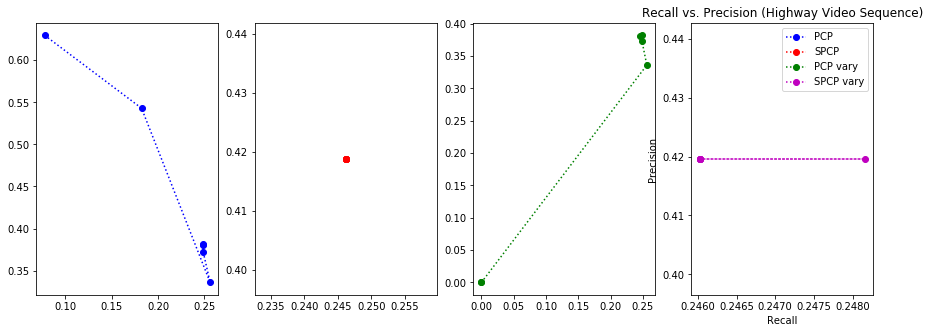

In [27]:
highway_recall_precision_plot = plt.figure(7)
f,ax = plt.subplots(1,4,figsize=(15,5))
x, = ax[0].plot(highway_pcp_recall, highway_pcp_precision, 'bo:', label="PCP")
y, = ax[1].plot(highway_spcp_recall, highway_spcp_precision, 'ro:', label="SPCP")
z, = ax[2].plot(highway_pcp_vary_recall, highway_pcp_vary_precision, 'go:', label="PCP vary")
w, = ax[3].plot(highway_spcp_vary_recall, highway_spcp_vary_precision, 'mo:', label="SPCP vary")
plt.legend(handles=[x,y,z,w])
plt.title('Recall vs. Precision (Highway Video Sequence)')
plt.xlabel('Recall')
plt.ylabel('Precision')
highway_recall_precision_plot.savefig('highway_recall_precision_plot.jpg')
plt.close(highway_recall_precision_plot)

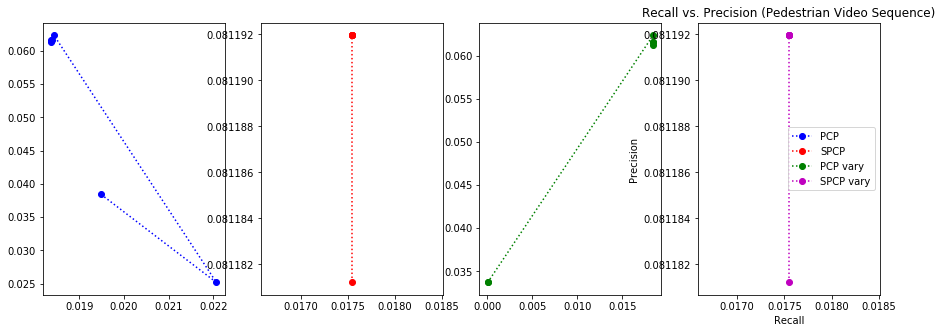

In [26]:
pedestrian_recall_precision_plot = plt.figure(8)
f,ax = plt.subplots(1,4,figsize=(15,5))
x, = ax[0].plot(pedestrian_pcp_recall, pedestrian_pcp_precision, 'bo:', label="PCP")
plt.title('Recall vs. Precision (Pedestrian Video Sequence)')
plt.xlabel('Recall')
plt.ylabel('Precision')
y, = ax[1].plot(pedestrian_spcp_recall, pedestrian_spcp_precision, 'ro:', label="SPCP")
z, = ax[2].plot(pedestrian_pcp_vary_recall, pedestrian_pcp_vary_precision, 'go:', label="PCP vary")
w, = ax[3].plot(pedestrian_spcp_vary_recall, pedestrian_spcp_vary_precision, 'mo:', label="SPCP vary")
plt.legend(handles=[x,y,z,w])
pedestrian_recall_precision_plot.savefig('pedestrian_recall_precision_plot.jpg')
plt.close(pedestrian_recall_precision_plot)

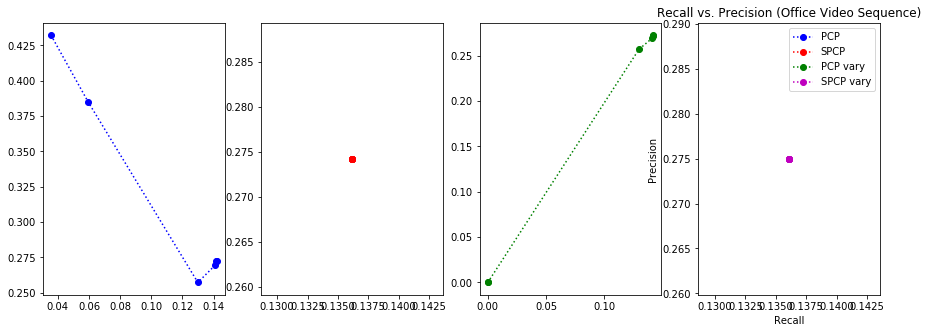

In [25]:
office_recall_precision_plot = plt.figure(9)
f,ax = plt.subplots(1,4,figsize=(15,5))
x, = ax[0].plot(office_pcp_recall, office_pcp_precision, 'bo:', label="PCP")
y, = ax[1].plot(office_spcp_recall, office_spcp_precision, 'ro:', label="SPCP")
z, = ax[2].plot(office_pcp_vary_recall, office_pcp_vary_precision, 'go:', label="PCP vary")
w, = ax[3].plot(office_spcp_vary_recall, office_spcp_vary_precision, 'mo:', label="SPCP vary")
plt.legend(handles=[x,y,z,w])
plt.title('Recall vs. Precision (Office Video Sequence)')
plt.xlabel('Recall')
plt.ylabel('Precision')
office_recall_precision_plot.savefig('office_recall_precision_plot.jpg')
plt.close(office_recall_precision_plot)

#### Receiver Operator Characteristic (ROC) Curves

In [12]:
highway_pcp_1_specificity = [0, (1-0.07119050344405017), (1-0.1706100985072416), (1-0.23535352855228694), (1-0.22424032265666557), (1-0.2236174983335241), (1-0.22359393200778363)]
highway_pcp_sensitivity = [0, 0.07804780366464004, 0.18233342573718786, 0.2561755803805477, 0.24862386823844962, 0.24816247012916826, 0.24813846137689965]
highway_spcp_1_specificity = [0, (1-0.22174229212817387), (1-0.22174229212817387), (1-0.22174229212817387), (1-0.22174229212817387), (1-0.22174229212817387), (1-0.22174229212817387)]
highway_spcp_sensitivity = [0, 0.24619663378440432, 0.24619663378440432, 0.24619663378440432, 0.24619663378440432, 0.24619663378440432, 0.24619663378440432]
highway_pcp_vary_1_specificity = [0, (1-0.0), (1-0.0), (1-0.23523233030562157), (1-0.22424368927462848), (1-0.2236174983335241), (1-0.22359729862574654)]
highway_pcp_vary_sensitivity = [0, 0.0, 0.0, 0.2560679795699915, 0.2486345430659085, 0.24816247012916826, 0.24814178010781696]
highway_spcp_vary_1_specificity = [0, (1-0.2215941609378051), (1-0.2215941609378051), (1-0.2215941609378051), (1-0.2215941609378051), (1-0.2215941609378051), (1-0.2215941609378051)]
highway_spcp_vary_sensitivity = [0, 0.2460251341374694, 0.2460251341374694, 0.2460251341374694, 0.2460251341374694, 0.2460251341374694, 0.2460251341374694]

pedestrian_pcp_1_specificity = [0, (1-0.019982416238221747), (1-0.022667762466313718), (1-0.018940769480705645), (1-0.018873874734810114), (1-0.018883431127080904), (1-0.018902543911622483)]
pedestrian_pcp_sensitivity = [0, 0.019489987370241105, 0.022072549096445376, 0.01843289414464411, 0.01836497523587326, 0.018375035602888657, 0.018393962138556284]
pedestrian_spcp_1_specificity = [0, (1-0.0180329122149806), (1-0.0180329122149806), (1-0.0180329122149806), (1-0.0180329122149806), (1-0.0180329122149806), (1-0.0180329122149806)]
pedestrian_spcp_sensitivity = [0, 0.017545992586858062, 0.017545992586858062, 0.017545992586858062, 0.017545992586858062, 0.017545992586858062, 0.017545992586858062]
pedestrian_pcp_vary_1_specificity = [0, (1-4.7781961353949655e-05), (1-4.7781961353949655e-05), (1-0.018940769480705645), (1-0.018883431127080904), (1-0.018892987519351694), (1-0.018902543911622483)]
pedestrian_pcp_vary_sensitivity = [0, 4.840523379148729e-05, 4.840523379148729e-05, 0.01843289414464411, 0.01837534050806531, 0.018384517421501465, 0.018393962138556284]
pedestrian_spcp_vary_1_specificity = [0, (1-0.0180329122149806), (1-0.0180329122149806), (1-0.0180329122149806), (1-0.0180329122149806), (1-0.0180329122149806), (1-0.0180329122149806)]
pedestrian_spcp_vary_sensitivity = [0, 0.017545992586858062, 0.017545992586858062, 0.017545992586858062, 0.017545992586858062, 0.017545992586858062, 0.017545992586858062]

office_pcp_1_specificity = [0, (1-0.03450169020162547), (1-0.05834911654000144), (1-0.12887607585528998), (1-0.1399630792836422), (1-0.14086332142600275), (1-0.1409436359713265)]
office_pcp_sensitivity = [0, 0.0357092768511365, 0.0595776212748529, 0.12989686723829738, 0.14089989053162907, 0.14179678012842023, 0.14187305603569847]
office_spcp_1_specificity = [0, (1-0.135385150200187), (1-0.135385150200187), (1-0.135385150200187), (1-0.135385150200187), (1-0.135385150200187), (1-0.135385150200187)]
office_spcp_sensitivity = [0, 0.13617121852615657, 0.13617121852615657, 0.13617121852615657, 0.13617121852615657, 0.13617121852615657, 0.13617121852615657]
office_pcp_vary_1_specificity = [0, (1-0.0), (1-0.0), (1-0.12866510033324544), (1-0.13996787418187048), (1-0.14086332142600275), (1-0.14094243724676944)]
office_pcp_vary_sensitivity = [0, 0.0, 0.0, 0.1296793615630713, 0.14090465733691093, 0.14179685171957396, 0.14187180801692828]
office_spcp_vary_1_specificity = [0, (1-0.1352856560619501), (1-0.1352856560619501), (1-0.1352856560619501), (1-0.1352856560619501), (1-0.1352856560619501), (1-0.1352856560619501)]
office_spcp_vary_sensitivity = [0, 0.13607314439542242, 0.13607314439542242, 0.13607314439542242, 0.13607314439542242, 0.13607314439542242, 0.13607314439542242]

sensitivity = [0, 0.05, 0.10, 0.15, 0.20, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]
specificity =  [0, 0.05, 0.10, 0.15, 0.20, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]

In [28]:
highway_roc_plot = plt.figure(10)
x, = plt.plot(highway_pcp_1_specificity,highway_pcp_sensitivity, 'mo', label="PCP")
y, = plt.plot( highway_spcp_1_specificity,highway_spcp_sensitivity, 'go', label="SPCP")
z, = plt.plot( highway_pcp_vary_1_specificity,highway_pcp_vary_sensitivity, 'bo', label="PCP vary")
w, = plt.plot( highway_spcp_vary_1_specificity,highway_spcp_vary_sensitivity, 'ro', label="SPCP vary")
plt.plot(sensitivity, specificity, 'k*:')
plt.legend(handles=[x,y,z,w])
plt.title('ROC Curve (Highway Video Sequence)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
highway_roc_plot.savefig('highway_roc_plot.jpg')
plt.close(highway_roc_plot)

pedestrian_roc_plot = plt.figure(11)
x, = plt.plot(pedestrian_pcp_1_specificity, pedestrian_pcp_sensitivity, 'mo', label="PCP")
y, = plt.plot(pedestrian_spcp_1_specificity, pedestrian_spcp_sensitivity, 'go', label="SPCP")
z, = plt.plot(pedestrian_pcp_vary_1_specificity, pedestrian_pcp_vary_sensitivity, 'bo', label="PCP vary")
w, = plt.plot(pedestrian_spcp_vary_1_specificity, pedestrian_spcp_vary_sensitivity, 'ro', label="SPCP vary")
plt.plot(sensitivity, specificity, 'k*:')
plt.legend(handles=[x,y,z,w])
plt.title('ROC Curve (Pedestrian Video Sequence)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
pedestrian_roc_plot.savefig('pedestrian_roc_plot.jpg')
plt.close(pedestrian_roc_plot)

office_roc_plot = plt.figure(12)
x, = plt.plot(office_pcp_1_specificity, office_pcp_sensitivity, 'mo', label="PCP")
y, = plt.plot(office_spcp_1_specificity, office_spcp_sensitivity, 'go', label="SPCP")
z, = plt.plot(office_pcp_vary_1_specificity, office_pcp_vary_sensitivity, 'bo', label="PCP vary")
w, = plt.plot(office_spcp_vary_1_specificity, office_spcp_vary_sensitivity, 'ro', label="SPCP vary")
plt.plot(sensitivity, specificity, 'k*:')
plt.legend(handles=[x,y,z,w])
plt.title('ROC Curve (Office Video Sequence)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
office_roc_plot.savefig('office_roc_plot.jpg')
plt.close(office_roc_plot)

#### Varying lambda (penalty parameter), Threshold 10, Tolerance 10^(-3) - Highway Video Sequence

In [4]:
lamb = [0.001, 0.002, 0.003608, 0.0045, 0.006, 0.009, 0.012]
fmeasure = [0.16282078, 0.2508379816978429, 0.287527, 0.3086035809708685, 0.3194887303642547, 0.2783754889217418, 0.19734992338070545]

penalty_lambda = plt.figure(13)
plt.plot(lamb, fmeasure, 'r*-')
plt.title('Penalty Parameter lambda against F-measure')
plt.xlabel('Lambda')
plt.ylabel('F-measure')
penalty_lambda.savefig('penalty_lambda.jpg')
plt.close(penalty_lambda)

#### Varying threshold, default lambda (penalty parameter), Tolerance 10^(-3) - Highway Video Sequence

In [5]:
threshold = [10, 20, 30, 40, 50, 100]
fmeasure = [0.287527, 0.3089389485849716, 0.2896830429544521, 0.2655341764439842, 0.2418567714321165, 0.2418567714321165]

threshold_fmeasure = plt.figure(13)
plt.plot(threshold, fmeasure, 'b*-')
plt.title('Threshold for Binary Masking against F-measure')
plt.xlabel('Threshold')
plt.ylabel('F-measure')
threshold_fmeasure.savefig('threshold_fmeasure.jpg')
plt.close(threshold_fmeasure)